# Workshop 9: Convolutional Neural Network
## 1. Gradient Descent for MLP

In [110]:
import numpy as np
from matplotlib import pyplot as plt

data_2D = np.array([[1,0,0],#0
                    [1,1,0],#1
                    [1,0,1],#1
                    [1,1,1]])#0
y = np.array([0,1,1,0])

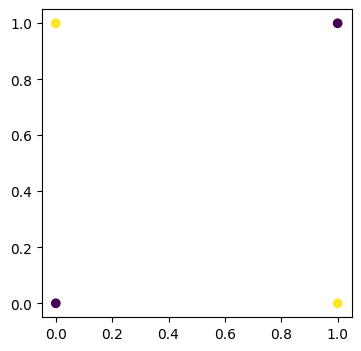

In [111]:

plt.figure(figsize=[4,4])

plt.scatter(data_2D[:,1],data_2D[:,2],c = y)
plt.show()

In [112]:
theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0,0.0],
                    [0.0,0.0]])
y = y.reshape(-1,1)

In [113]:
def sigmoid(data, theta):
    return 1/(1+np.exp(-data@theta))

In [114]:
alpha = 0.01
epoches = 50000

for itr in range(epoches):
    h_1 = sigmoid (data_2D,theta_1)
    h_2 = sigmoid(h_1,theta_2)

    theta_2 -= alpha * h_1.T @(h_2-y)
    theta_1 -= alpha * data_2D.T @(((h_2 - y)@theta_2.T)*h_1*(1-h_1))


h_1 = sigmoid (data_2D,theta_1)
h_2 = sigmoid(h_1,theta_2)

h_2


array([[0.04328607, 0.04340658],
       [0.9775699 , 0.97749794],
       [0.9775699 , 0.97749794],
       [0.0352768 , 0.03539171]])

## 2. Convolutional Neural Network
### 2.1 Importing the image

In [115]:
import cv2

### 2.2 Padding

(512, 512)


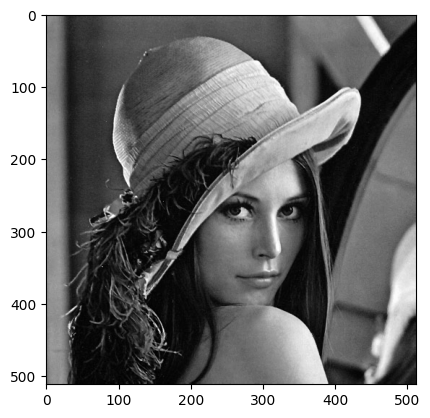

In [116]:
# Load the image
image = cv2.imread('lena.png',0)
print(image.shape)
plt.imshow(image,cmap='gray')

In [117]:

# Specify the padding
# Use numpy pad function to pad the image
padded_image = np.pad(image, ((1,1),(1,1)))

padded_image.shape

(514, 514)

### 2.3 Convolution

In [118]:
#Con_kernel = [1,1,1,1,1,1,1,1,1]
Con_kernel = np.ones(shape=9)
#Con_kernel = [1,1,1,1,2,1,1,1,1]
#Con_kernel = [1,2,1,2,4,2,1,2,1]

#Con_kernel = [0,-1,0,-1,5,-1,0,-1,0]
#Con_kernel = [-1,-1,-1,-1,9,-1,-1,-1,-1] 
#Con_kernel = [1,-2,1,-2,5,-2,1,-2,1] 

#Con_kernel = [-1,0,-1,0,4,0,-1,0,-1]
#Con_kernel = [-1,-1,-1,-1,8,-1,-1,-1,-1]

#Con_kernel = [-1,0,1,-2,0,2,-1,0,1]
#Con_kernel = [1,2,1,0,0,0,-1,-2,-1]
#Con_kernel = [2,1,0,1,0,-1,0,-1,-2]

In [119]:
Con_kernel

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [120]:
pixel_list=[]
for i in range(1,513):
    for j in range(1,513):
        neighbourlist=[]
        
        neighbourlist.append(padded_image[i-1][j-1]*Con_kernel[0]) 
        neighbourlist.append(padded_image[i-1][j]*Con_kernel[1])    # first row
        neighbourlist.append(padded_image[i-1][j+1]*Con_kernel[2]) 
        
        neighbourlist.append(padded_image[i][j-1]*Con_kernel[3]) 
        neighbourlist.append(padded_image[i][j]*Con_kernel[4])      # second row
        neighbourlist.append(padded_image[i][j+1]*Con_kernel[5])

        neighbourlist.append(padded_image[i+1][j-1]*Con_kernel[6])
        neighbourlist.append(padded_image[i+1][j]*Con_kernel[7])    # third row 
        neighbourlist.append(padded_image[i+1][j+1]*Con_kernel[8])           

        pixel_list.append(sum(neighbourlist))

conv_image = np.array(pixel_list).reshape(512,512)

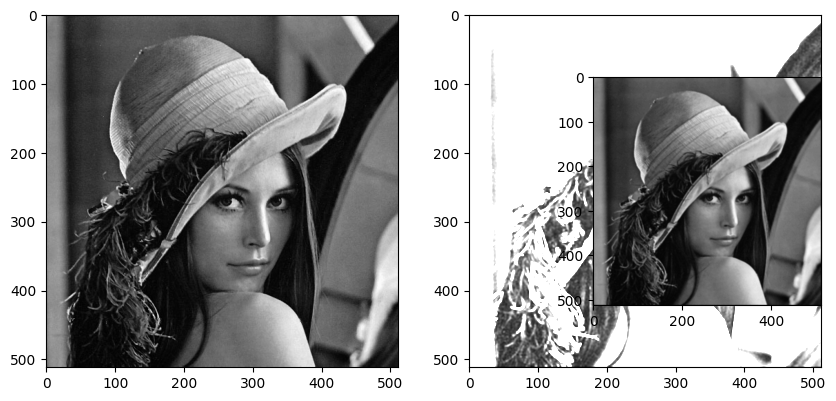

In [122]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(1,2,2)
plt.imshow(conv_image,cmap='gray',vmin=0,vmax=255)
plt.subplot(1,3,3)
plt.imshow(conv_image/9,cmap='gray',vmin=0,vmax=255)

### 2.4 Pooling

#### Exercise. Could you use the other method (average pooling) to implement the pooling operation?

### 2.5 Fully-connection